![board game](board_game.jpg)

## 💾 The Data

You've come across a dataset titled `bgg_data.csv` containing details on over `20,000` ranked board games from the BoardGameGeek (BGG) website. BGG is the premier online hub for board game enthusiasts, hosting data on more than `100,000` games, inclusive of both ranked and unranked varieties. This platform thrives due to its active community, who contribute by posting reviews, ratings, images, videos, session reports, and participating in live discussions.

This specific dataset, assembled in `February 2021`, encompasses all ranked games listed on BGG up to that date. Games without a ranking were left out because they didn't garner enough reviews; for a game to earn a rank, it needs a minimum of `30` votes.

In this dataset, each row denotes a board game and is associated with some information.

| Column     | Description              |
|------------|--------------------------|
| `ID` | The ID of the board game. |
| `Name` | The name of the board game.|
| `Year Published` | The year when the game was published.|
| `Min Players` | The minimum number of player recommended for the game.|
| `Max Players` | The maximum number of player recommended for the game.|
| `Play Time` | The average play time suggested by game creators, measured in minutes.|
| `Min Age` | The recommended minimum age of players.|
| `Users Rated` | The number of users who rated the game.|
| `Rating Average` | The average rating of the game, on a scale of 1 to 10.|
| `BGG Rank` | The rank of the game on the BoardGameGeek (BGG) website.| 
| `Complexity Average` | The average complexity value of the game, on a scale of 1 to 5.|
| `Owned Users` |  The number of BGG registered owners of the game.| 
| `Mechanics` | The mechanics used by the game.| 
| `Domains` | The board game domains that the game belongs to.|

**Source:** Dilini Samarasinghe, July 5, 2021, "BoardGameGeek Dataset on Board Games", IEEE Dataport, doi: https://dx.doi.org/10.21227/9g61-bs59.

# Executive Summary #

## Game Night Problem ##
Too many boardgames to choose from. There are over 20,000 Board games to choose from in our dataset. We need to a way to determine the best choice for a Game Night with Friends.

## Solution ##
### Find the highest rated games across different domains. Narrow down the choice criteria: ###
* can be completed in a single night 
* has a higher rating average
* may be something our friends have heard of before
* can be played with more than one person 
* higher Rating Average when more players are involved

## The Game Recomendation of a Higher Caliber ## 
# 2GM Pacific #
### Reasons: ###
* play time is 90 Minutes
* players involved  1 - 4
* rating average is higher than the most popular games in other domains
* friends unavailable or if your'e an introvert you can play by yourself

**import modules** 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Understanding the Games #
## Investigate Data ##
* import CSV 
* Find how many rows exist in the original dataset given "bgg_data.csv"
* Find which columns have Null values

In [2]:
# create boardgames DataFrame
boardgames = pd.read_csv('data/bgg_data.csv')

# display information about our DataFrame
print(boardgames.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20343 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  20327 non-null  float64
 1   Name                20343 non-null  object 
 2   Year Published      20342 non-null  float64
 3   Min Players         20343 non-null  int64  
 4   Max Players         20343 non-null  int64  
 5   Play Time           20343 non-null  int64  
 6   Min Age             20343 non-null  int64  
 7   Users Rated         20343 non-null  int64  
 8   Rating Average      20343 non-null  float64
 9   BGG Rank            20343 non-null  int64  
 10  Complexity Average  20343 non-null  float64
 11  Owned Users         20320 non-null  float64
 12  Mechanics           18745 non-null  object 
 13  Domains             10184 non-null  object 
dtypes: float64(5), int64(6), object(3)
memory usage: 2.2+ MB
None


# 20,343 Rows, that's a lot of games!  # 
## DataFrame current Info: ##
* Max Non-Null Count, 20,343
* "Domains" column has most nulls as the Non-Null Count is 10,184

### Let's start cleaning ###
* Handling Null Values by dropping from the Data
* Quick we need Cleaning Chucks !!!
* ![Cleaning Chucks](Cleaning%20Chucks.png)


In [3]:
# Drop all rows with Nulls Values
boardgames_cleaner = pd.DataFrame(boardgames.dropna())

# Check info for new Non-Null Count
boardgames_cleaner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9709 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  9709 non-null   float64
 1   Name                9709 non-null   object 
 2   Year Published      9709 non-null   float64
 3   Min Players         9709 non-null   int64  
 4   Max Players         9709 non-null   int64  
 5   Play Time           9709 non-null   int64  
 6   Min Age             9709 non-null   int64  
 7   Users Rated         9709 non-null   int64  
 8   Rating Average      9709 non-null   float64
 9   BGG Rank            9709 non-null   int64  
 10  Complexity Average  9709 non-null   float64
 11  Owned Users         9709 non-null   float64
 12  Mechanics           9709 non-null   object 
 13  Domains             9709 non-null   object 
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


# 9,709 Rows, Cleaner Data maybe... #
 * We now have 9,709 Non-Null Count for rows in each column
 * Check Name for Unique Values
 * Check ID for Unique Values

In [4]:
# Unique Name Check
u_name = boardgames_cleaner['Name'].nunique()
print("Unique Name(s): " + str(u_name))

# Unique ID Check
u_id = boardgames_cleaner['ID'].nunique()
print("Unique ID(s): " + str(u_id))

Unique Name(s): 9592
Unique ID(s): 9709


# Just Keep Cleaning, Cleaning, Cleaning: #
* Unique Names: 9,592
* Unique IDs: 9709
* Remove Rows with duplicate name values
* Remove Rows with any null values
* Display Info for the even cleaner Dataframe 

In [5]:
bg_cleaner = boardgames_cleaner.drop_duplicates('Name')
bg_cleaner = bg_cleaner.dropna()
bg_cleaner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9592 entries, 0 to 20342
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  9592 non-null   float64
 1   Name                9592 non-null   object 
 2   Year Published      9592 non-null   float64
 3   Min Players         9592 non-null   int64  
 4   Max Players         9592 non-null   int64  
 5   Play Time           9592 non-null   int64  
 6   Min Age             9592 non-null   int64  
 7   Users Rated         9592 non-null   int64  
 8   Rating Average      9592 non-null   float64
 9   BGG Rank            9592 non-null   int64  
 10  Complexity Average  9592 non-null   float64
 11  Owned Users         9592 non-null   float64
 12  Mechanics           9592 non-null   object 
 13  Domains             9592 non-null   object 
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


# "Even Cleaner" Data, Investigate Further & Slim Down #

In [6]:
bg_cleaner

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,174430.0,Gloomhaven,2017.0,1,4,120,14,42055,8.79,1,3.86,68323.0,"Action Queue, Action Retrieval, Campaign / Bat...","Strategy Games, Thematic Games"
1,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,8.61,2,2.84,65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
2,224517.0,Brass: Birmingham,2018.0,2,4,120,14,19217,8.66,3,3.91,28785.0,"Hand Management, Income, Loans, Market, Networ...",Strategy Games
3,167791.0,Terraforming Mars,2016.0,1,5,120,12,64864,8.43,4,3.24,87099.0,"Card Drafting, Drafting, End Game Bonuses, Han...",Strategy Games
4,233078.0,Twilight Imperium: Fourth Edition,2017.0,3,6,480,14,13468,8.70,5,4.22,16831.0,"Action Drafting, Area Majority / Influence, Ar...","Strategy Games, Thematic Games"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20337,1410.0,Trouble,1965.0,2,4,45,4,3255,3.79,20339,1.05,4962.0,Roll / Spin and Move,Children's Games
20339,7316.0,Bingo,1530.0,2,99,60,5,2154,2.85,20341,1.05,1533.0,"Betting and Bluffing, Bingo, Pattern Recognition",Party Games
20340,5048.0,Candy Land,1949.0,2,4,30,3,4006,3.18,20342,1.08,5788.0,Roll / Spin and Move,Children's Games
20341,5432.0,Chutes and Ladders,-200.0,2,6,30,3,3783,2.86,20343,1.02,4400.0,"Dice Rolling, Grid Movement, Race, Roll / Spin...",Children's Games


# SO MANY DOMAINS, HOW MANY ARE THERE? 
* Count Unique Values for Domains
* **39 "Unique values" for Domains**
* Check what those values are
* Count how many times those values appear in our Data

In [7]:
bg_cleaner['Domains'].nunique()

39

In [8]:
count_u_doms = bg_cleaner['Domains'].value_counts()

print(count_u_doms)

Wargames                                          2957
Strategy Games                                    1441
Family Games                                      1279
Abstract Games                                     725
Thematic Games                                     620
Children's Games                                   595
Party Games                                        372
Family Games, Strategy Games                       344
Strategy Games, Thematic Games                     206
Customizable Games                                 191
Thematic Games, Wargames                           136
Family Games, Party Games                          119
Abstract Games, Family Games                       110
Family Games, Thematic Games                       103
Strategy Games, Wargames                            96
Children's Games, Family Games                      95
Abstract Games, Strategy Games                      39
Party Games, Thematic Games                         34
Customizab

# Games w/ Multiple-Domain Domains #
Lets figure out what the base domains are.

## Single Domains Found: ##
* Strategy Games
* Thematic Games
* Customizable Games
* Family Games
* Party Games
* Wargames
* Children's Games
* Abstract Games
### Lets make an assumption to slim down the number of Domains being dealt with ###
* **If Domain is the first domain of a Multi-Domain Domain that is the assumed proper Domain    
    Example: Multi-Domain Domain = 'Family Games, Party Games, Thematic Games' | Assumed Domain = 'Family Game'**
    
## Clean the Domains: ##
* Create Dictionary where the Key is the Multi-Domain Domains & the Value is the Assumed Domain
* Reverse iterate through dictionary key & value
* During reverse iteration, clean the "Multi-Domain Domains" in DataFrame by replacing with "Assumed Domain" 
* Retrieve the new value counts of the Domain Column


In [9]:
dom_dict = {"Family Games, Strategy Games" : "Family Games",                    
"Strategy Games, Thematic Games" : "Strategy Games",
"Thematic Games, Wargames" : "Thematic Games",
"Family Games, Party Games" : "Family Games",
"Abstract Games, Family Games" : "Abstract Games",
"Family Games, Thematic Games" : "Family Games",
"Strategy Games, Wargames" : "Strategy Games",
"Children's Games, Family Games" : "Children's Games",
"Abstract Games, Strategy Games" : "Abstract Games",
"Party Games, Thematic Games" : "Party Games",
"Customizable Games, Strategy Games" : "Customizable Games",
"Abstract Games, Children's Games" : "Abstract Games",
"Customizable Games, Wargames" : "Customizable Games",
"Customizable Games, Thematic Games" : "Customizable Games",
"Abstract Games, Wargames" : "Abstract Games",
"Party Games, Strategy Games" : "Party Games",
"Children's Games, Party Games" : "Children's Games",
"Family Games, Wargames" : "Family Games",
"Abstract Games, Party Games" : "Abstract Games",
"Strategy Games, Thematic Games, Wargames" : "Strategy Games",
"Children's Games, Wargames" : "Children's Games",
"Abstract Games, Customizable Games" : "Abstract Games",
"Family Games, Party Games, Thematic Games" : "Family Games",
"Family Games, Strategy Games, Thematic Games" : "Family Games",
"Family Games, Thematic Games, Wargames" : "Family Games",
"Party Games, Wargames" : "Party Games",
"Customizable Games, Thematic Games, Wargames" : "Customizable Games",
"Abstract Games, Children's Games, Wargames" : "Abstract Games",
"Abstract Games, Strategy Games, Thematic Games" : "Abstract Games",
"Children's Games, Family Games, Party Games" : "Children's Games",
"Abstract Games, Thematic Games" : "Abstract Games"}

# cast string onto Domains 
bg_cleaner['Domains'] = bg_cleaner['Domains'].astype(str)

# reverse iteration to clean & consolidate Domains values
for key,value in reversed(dom_dict.items()): bg_cleaner['Domains'] = bg_cleaner['Domains'].str.replace(key,value)

# display count of Domains
bg_cleaner['Domains'].value_counts()

Wargames              2957
Family Games          1853
Strategy Games        1747
Abstract Games         915
Thematic Games         756
Children's Games       701
Party Games            414
Customizable Games     249
Name: Domains, dtype: int64

# Domains Cleaned, Determine Enjoyability #
**Still too many choices to choose from?** Remember the game of choice should be enjoyable.
Games with higher **Average Ratings** & **BGG Ranks** can be used to measure a game's enjoyability.
## Find Enjoyability, based on: 
* Average, Rating Average -  6.623599
* Average, BGG Rank - 7577.093724
* Drop Rows where these Averages are not met 

In [10]:
# print Averages
print('AVG, Rating Average: ' + str(bg_cleaner['Rating Average'].mean()))
print('AVG, BGG Rank: ' + str(bg_cleaner['BGG Rank'].mean()))

AVG, Rating Average: 6.6235988323603
AVG, BGG Rank: 7577.093723936614


In [11]:
rating_avg = bg_cleaner['Rating Average'].mean()
bgg_avg =   bg_cleaner['BGG Rank'].mean()                       
bg_cleaner = bg_cleaner[bg_cleaner['Rating Average'] >= rating_avg ]
bg_cleaner = bg_cleaner[bg_cleaner['BGG Rank'] >= bgg_avg ]
bg_cleaner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1125 entries, 7576 to 17275
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  1125 non-null   float64
 1   Name                1125 non-null   object 
 2   Year Published      1125 non-null   float64
 3   Min Players         1125 non-null   int64  
 4   Max Players         1125 non-null   int64  
 5   Play Time           1125 non-null   int64  
 6   Min Age             1125 non-null   int64  
 7   Users Rated         1125 non-null   int64  
 8   Rating Average      1125 non-null   float64
 9   BGG Rank            1125 non-null   int64  
 10  Complexity Average  1125 non-null   float64
 11  Owned Users         1125 non-null   float64
 12  Mechanics           1125 non-null   object 
 13  Domains             1125 non-null   object 
dtypes: float64(5), int64(6), object(3)
memory usage: 131.8+ KB


# Knowing is Half the Battle, Determine Popularity #
**The popularity of a game could influence our friends if they are familiar with it or have heard about the game we choose.**
Using the average of **Owned Users** can help us find more popular games.
## Find Popularity, based on: ##
* Finding average of Owned Users
* Remove Rows where Owned Users is not greater than or equal to its average
* Show New info

In [12]:
print(bg_cleaner['Owned Users'].mean())

202.8231111111111


In [13]:
# assign owner average 
owners_avg = bg_cleaner['Owned Users'].mean()

# clean DataFrame with Owned Users average
bg_cleaner = bg_cleaner[bg_cleaner['Owned Users'] >= owners_avg]

# display the new info for the DataFrame
print(bg_cleaner.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 7576 to 14102
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  519 non-null    float64
 1   Name                519 non-null    object 
 2   Year Published      519 non-null    float64
 3   Min Players         519 non-null    int64  
 4   Max Players         519 non-null    int64  
 5   Play Time           519 non-null    int64  
 6   Min Age             519 non-null    int64  
 7   Users Rated         519 non-null    int64  
 8   Rating Average      519 non-null    float64
 9   BGG Rank            519 non-null    int64  
 10  Complexity Average  519 non-null    float64
 11  Owned Users         519 non-null    float64
 12  Mechanics           519 non-null    object 
 13  Domains             519 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 60.8+ KB
None


# Find Domains Rating Averages #
* Create List of columns to keep 
* Create new DataFrame with those kept columns
* Create Index & tick labels for an x-axis based on Domains
* Create Visualization to show Rating Average by Domains
* Show Visualization

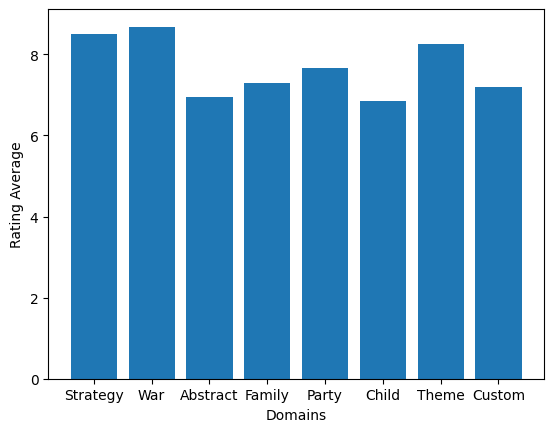

In [14]:
# list of columns to keep
cols2keep = ['ID' , 'Name' , 'Max Players' , 'Play Time' , 'Rating Average' , 'BGG Rank' , 'Complexity Average' , 'Owned Users' , 'Mechanics' , 'Domains']

# new DataFrame with kept columns
bg_slim = bg_cleaner.loc[: , cols2keep]  

# x-axis ticks: index & labels
x = [0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 ]
xtick_labels = ['Strategy' , 'War' , 'Abstract' , 'Family', 'Party' , 'Child' , 'Theme' , 'Custom']

# create visualization  
plt.bar(bg_slim['Domains'] , bg_slim['Rating Average'])
plt.xlabel('Domains')
plt.ylabel('Rating Average')
plt.xticks(x , xtick_labels)

# show visualization 
plt.show()

# Top 3 Domains #
* create list of Domains to keep
* create new DataFrame of the Top 3 Domains
* create vizualization of the top 3 Domains
* show visualization

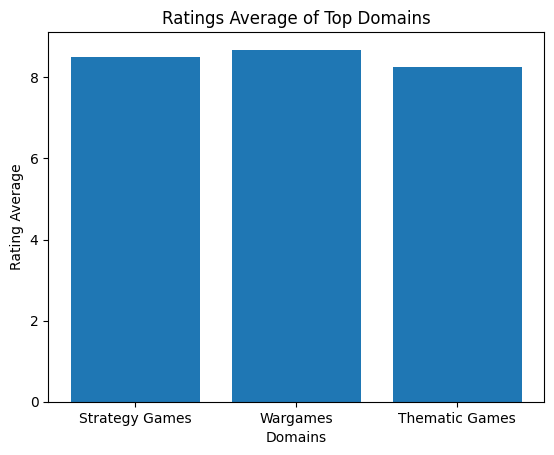

In [15]:
# list of top domain 
bg_top_domains = ['Strategy Games' , 'Thematic Games' , 'Wargames']

# new DataFrame for boardgames in Top Domains
bg_top_doms = bg_slim[bg_slim['Domains'].isin(bg_top_domains)]

# create visualization
plt.bar(bg_top_doms['Domains'] , bg_top_doms['Rating Average'])
plt.title('Ratings Average of Top Domains')
plt.xlabel('Domains')
plt.ylabel('Rating Average')

# show visualization
plt.show()

# Visualize Rating Average with Max Players per Top Domains  #

* Create 3 Data Frame for each Domain 
* Visualize Domain Dataframes using Rating Average and Max Players
* Use Different Colors for Domains
* Provide Legend for legibility
* Show Visualization 

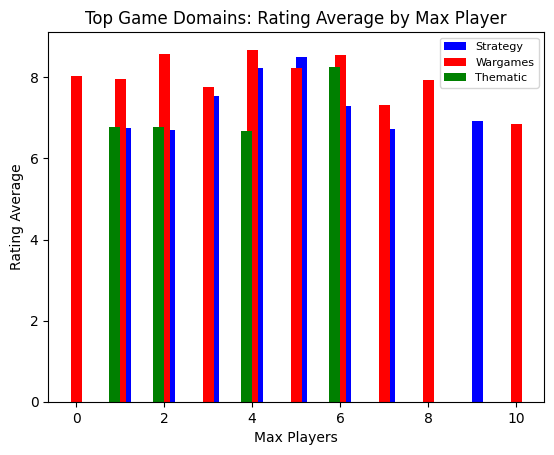

In [16]:
# create new DataFrames ffor Strategy Games, Wargames & Thematic Games
strategy_df = bg_top_doms[bg_top_doms['Domains'] == 'Strategy Games']
wargames_df = bg_top_doms[bg_top_doms['Domains'] == 'Wargames']
thematic_df = bg_top_doms[bg_top_doms['Domains'] == 'Thematic Games']

# create visualization
plt.bar(strategy_df['Max Players'] , strategy_df['Rating Average'] , label = 'Strategy' , color = 'b' , width = 0.25 , align = 'edge')
plt.bar(wargames_df['Max Players'], wargames_df['Rating Average'] , label = 'Wargames' , color = 'r' , width = 0.25 , align = 'center')
plt.bar(thematic_df['Max Players'] , thematic_df['Rating Average'] , label = 'Thematic' , color = 'g' , width = - 0.25, align = 'edge')
plt.legend(loc='upper right', fontsize=8)
plt.xlabel('Max Players')
plt.ylabel('Rating Average')
plt.title('Top Game Domains: Rating Average by Max Player')

# show visualization 
plt.show()

# Max Players & Rating Average

## Strategy Games: 
* appear to have the highest ratings between 3 - 6 players 
* absolute highest Rating Average occurs when 5 Players are involved
## Wargames: 
* appear to have the highest ratings between 2 - 6 Players 
* absolute highest Rating Average occurs when 4 Players are involved
## Thematic Games: 
* appear to have highest rating when 6 Players involved with an Rating Average above 8 
* all other Rating Average seem to be below 7 when less than 6 players involved
* no Rating Average for Thematic Games when more than 6 Players are involved

## Find the Top Rated Games in their respective Domain

In [17]:
# top rated Wargames 
wargame_choices = wargames_df[['Name' , 'Play Time' , 'Rating Average']][(wargames_df['Max Players'] == 4) & (wargames_df['Rating Average'] >= 8.4)]

wargame_choices

,Name,Play Time,Rating Average
8463,Montélimar: Anvil of Fate,3000,8.68
8480,2GM Pacific,90,8.54


In [18]:
# top rated Strategy Game
strategy_games_choice = strategy_df[['Name' , 'Play Time' , 'Rating Average']][(strategy_df['Max Players'] == 5) & (strategy_df['Rating Average'] >= 8.3)]

strategy_games_choice

,Name,Play Time,Rating Average
7650,Kemet: Blood and Sand,120,8.49


In [19]:
# top rated Thematic Game
thematic_games_choice = thematic_df[['Name' , 'Play Time' , 'Rating Average']][(thematic_df['Max Players'] == 6) & (thematic_df['Rating Average'] >= 7)]

thematic_games_choice

,Name,Play Time,Rating Average
7739,The Supershow,10,8.26


# Top Rated Games by Domain #
## Wargames: ##
### Montélimar: Anvil of Fate ##
* Rating Average - 8.68
* 3000 Minute Play Time 
* Highest Rated 
* Takes two days & two hours to complete if you played straight through 

### 2GM Pacific ##
* Rating Average - 8.54
* 90 Minute Play Time 
* Second Highest Rated Wargame 
* At 90 minutes sounds like a nice visit with friends 

## Strategy Game: ##
### Kemet: Blood and Sand ###
* Rating Average - 8.49
* 120 Minute Play Time 
* May seem long for others 
 
 ## Thematic Game: ##
 ### The Super Show ###
 * Rating Average - 8.26
 * 10 Minute Play Time 
 * Could play many times even across an hour visit
 * Need your friends to leave soon this is the pick for you 